# FSDS24 - Week 1, Lab 2: Exploring bivariate relationships

In this lab, you will be encouraged to explore the relationships between two variables in the data set. This will involve some data cleaning in addition to any statistical routines. You are welcome to use the same data as in the previous lab and to borrow code from the virtual walkthrough as well as from the last lab. 

The important distinctions to make below are whether we are dealing with continuous or categorical data and whether the continuous data should be considered by value (parametric) or by rank order (non-parametric). You are again welcome to process any column in the data set for this as well as to filter the data according to any goals that you might have for inquiry. There is no need to develop a specific research question at this time, but you should be considering research questions as a form of motivation when exploring this data. 

On Friday October 18th you will be encouraged to share these results with your group during the first part of the tutorial. 

# Exercise 1. A bivariate correlation

- Locate two numeric varaibles within the columns. 
- Filter the data so that you only have valid columns according to some reasonable logic.
- Report on the key measures of central tendency (mean, median, and standard deviation; mode might not be relevant for numeric data due to resolution issues)
- Produce a JointPlot or a ScatterPlot for these two varaibles. 
 - Unlike the Iris Data, we would not assume that your data will be faceted, though it might be depending on your question. 
 - Consider whether a parametric or non-parametric correlation is more suitable. 
 - Perform a correlation (Pearson product moment or Spearman's Rank Order correlation) and report the results. 
   - You can perform both and explain the difference if you are unsure or believe that both might be suitable. 

In this case, we would prefer that you select variables which you think might have some meaningful relationship to each other. Prior to your analysis, introduce your variables and explain why a relationship between them is tenable. Then when you select your bivariate relationship to explore based on the PairGrid. You do not need to write the specific null hypothesis but it might help your wording. In practice, we rarely state the null explicitly but instead often assert a hypothesis that implies the null hypothesis.

Thereafter, you are welcome to explore other relationships which might be tenable or significant but we encourage you to first think deductively. 

In [2]:
# YOUR ANSWER HERE (Create new markdown or Python cells as appropriate)
import numpy as np
from scipy import stats
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr, spearmanr
%config InlineBackend.figure_format = 'svg'



stack_df = pd.read_feather("/Users/charliewang/Desktop/OII/Intro to Python/Week 1/data/movies_stack_df.feather")

stack_df.describe()


#print(stack_df.info())
#print("The variables in this data set are:\n", "\n".join(stack_df.columns))
#display(stack_df)

,CreationDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
count,64054,64054.000000,2.257000e+04,40848,64054,22570.000000,64054.000000,4886.000000,2080,68
mean,2017-01-28 07:30:11.645309952,7.262966,7.704065e+03,2017-09-29 02:42:58.998855424,2017-08-23 05:14:14.532300032,1.640939,1.576888,0.000614,2018-03-01 01:13:03.962836992,2016-09-06 08:22:45.394588160
min,2011-10-03 15:29:31.590000,-24.000000,6.000000e+00,2011-12-01 01:28:28.097000,2011-10-04 18:17:13.013000,0.000000,0.000000,0.000000,2012-05-11 12:07:26.233000,2013-01-07 16:46:19.967000
25%,2015-02-24 16:08:22.124000,1.000000,4.220000e+02,2015-12-29 13:49:01.824000,2015-11-18 07:26:38.204499968,1.000000,0.000000,0.000000,2017-11-27 08:27:23.398500096,2014-07-31 11:56:58.958000128
50%,2017-01-05 17:55:53.952999936,4.000000,1.428000e+03,2017-07-03 14:04:47.221999872,2017-06-07 07:15:49.952999936,1.000000,1.000000,0.000000,2018-01-19 13:25:36.808499968,2016-04-12 13:53:40.111500032
75%,2018-12-11 20:24:26.234499840,9.000000,5.138000e+03,2019-11-05 05:49:14.064000,2019-05-20 05:03:03.467749888,2.000000,2.000000,0.000000,2018-05-02 11:12:56.732749824,2018-10-16 13:55:45.997250048
max,2023-09-02 22:53:45.120000,326.000000,1.528888e+06,2023-09-02 23:52:04.107000,2023-09-02 23:52:04.107000,19.000000,31.000000,1.000000,2023-09-02 06:19:35.427000,2023-03-08 16:46:15.337000
std,NaN,11.699989,2.936640e+04,NaN,NaN,1.445729,2.440911,0.024774,NaN,NaN


In [4]:
# Select the two numerical variables
filtered_columns = stack_df[["Score", "ViewCount"]]

# Calculate the central tendency for the selected columns only
mean_values_numeric_df = filtered_columns.mean()
median_values_numeric_df = filtered_columns.median()
std_numeric_df = filtered_columns.std()

# Create a DataFrame with the summary statistics
summary_stats = pd.DataFrame({
    'Mean': mean_values_numeric_df,
    'Median': median_values_numeric_df,
    'Standard Deviation': std_numeric_df
})

print(summary_stats)


                  Mean  Median  Standard Deviation
Score         7.262966     4.0           11.699989
ViewCount  7704.065042  1428.0        29366.396235


In [5]:
# produce the scatterplot for the two variables 
plt.figure(figsize=(10, 6))
plt.scatter(stack_df["Score"], stack_df["ViewCount"], alpha=0.7)
plt.xlabel("Score")
plt.ylabel("ViewCount")
plt.title("Scatter Plot of Score vs. ViewCount")

# Show the plot
plt.show()

In [6]:

numeric_df = filtered_columns.select_dtypes(include=['number'])


clean_df = numeric_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["Score", "ViewCount"])


mean_score, mean_viewcount = clean_df["Score"].mean(), clean_df["ViewCount"].mean()
score_diff, viewcount_diff = clean_df["Score"] - mean_score, clean_df["ViewCount"] - mean_viewcount


numerator = (score_diff * viewcount_diff).sum()
denominator = np.sqrt((score_diff ** 2).sum() * (viewcount_diff ** 2).sum())
manual_pearson_corr = numerator / denominator


pearson_corr, pearson_p_value = stats.pearsonr(clean_df["Score"], clean_df["ViewCount"])


spearman_corr, spearman_p_value = stats.spearmanr(clean_df["Score"], clean_df["ViewCount"])


tot_corr, tot_p_value = stats.spearmanr(stack_df["Score"], stack_df["ViewCount"])


print(f"Manual Pearson's correlation: {manual_pearson_corr:.3f}")
print(f"scipy Pearson's correlation: {pearson_corr:.3f}, p-value: {pearson_p_value:.3e}")
print(f"Spearman's correlation: {spearman_corr:.3f}, p-value: {spearman_p_value:.3e}")
print(f"For all data combined:\t corr = {tot_corr:.3f}, sig = {tot_p_value:.3f}")


print(f"\nDifference in Pearson's correlation (manual vs. scipy): {abs(manual_pearson_corr - pearson_corr):.3e}")


Manual Pearson's correlation: 0.299
scipy Pearson's correlation: 0.299, p-value: 0.000e+00
Spearman's correlation: 0.617, p-value: 0.000e+00
For all data combined:	 corr = nan, sig = nan

Difference in Pearson's correlation (manual vs. scipy): 0.000e+00


# Exercise 2. Considering categorical variables 

How might we locate a categorical varaible within the Movie Stack Exchange? What about two? Would you be able to construct your own Categorical variable? Here are some ideas for what might suit as a variable:
- Binary:
  - Presence or absence of a word in the BodyText
  - A 'cut point' on a distribution, such as all those above and below the elbow on a steep distribution.
- Multinomial: Different types of PostTypeID (though in fairness, it really ends up functionally binary as its mostly Questions and Answers)
  - Different 'roles' of users (we will see more of this tomorrow), but one role might be to post a question and one might be to only post an answer,
  - Presence of specific tags (note: that a post can have multiple tags so one would need to ensure these are _mutually exclusive_),
  - Different 'eras' of posts (we will see more of this next week when we explore data over a time series, but for now one might consider posts by year naively)

Find either two Categorical variables, or a Categorical variable and a continuous variable. Then, make a comparison test or a test of independence. Justify whether your means comparison test is parametric or non-parametric. 

Below you should: 
- Explain your two variables first in text: I chose X because ... and Y because .... Posit why you believe there should or should not be a relationship between the two variables in text.
- Then perform the analysis, first by doing an exploratory analysis reporting on the N for each group or category as well as key measures of central tendency. 
- Then show a plot or table that summarises the two variables jointly. This might be a box-plot, a bar chart, or a cross tab (for two categorical variables). 
- Then report the statistical test and comment on the results. 

Again, like in the analysis above, we recommend that you do not 'seek out' a relationship that is significant but start deductively from what you might understand about the nature of online communication, your own intuition, and where possible or appropriate, existing literature. We would be just as happy to see null findings done well as to see a significant value. 



In [7]:
# YOUR ANSWER HERE (Create new markdown or Python cells as appropriate)
# I will create a categorical variable of CreationDate of which I will use to draw correlation with Score to see if there is a correlation in that regard
# I think there could potentially be a correlation given that the time of posting would potentially impact a reviewer's mood which would affect the score of their reviews.
from scipy.stats import f_oneway

stack_df['CreationDate'] = pd.to_datetime(stack_df['CreationDate'])
stack_df['CreationHour'] = stack_df['CreationDate'].dt.hour
stack_df['TimeOfDay'] = pd.cut(stack_df['CreationHour'], bins=[0, 6, 12, 18, 24], 
                               labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Group continuous variable by time of day (e.g., 'TimeOfDay' category created from CreationDate)
morning_scores = stack_df[stack_df['TimeOfDay'] == 'Morning']['Score'].dropna().astype(float)
afternoon_scores = stack_df[stack_df['TimeOfDay'] == 'Afternoon']['Score'].dropna().astype(float)
evening_scores = stack_df[stack_df['TimeOfDay'] == 'Evening']['Score'].dropna().astype(float)
night_scores = stack_df[stack_df['TimeOfDay'] == 'Night']['Score'].dropna().astype(float)


In [8]:

morning_scores_mean = morning_scores.mean()
morning_scores_median = morning_scores.median()
morning_scores_std = morning_scores.std()

afternoon_scores_mean = afternoon_scores.mean()
afternoon_scores_median = afternoon_scores.median()
afternoon_scores_std = afternoon_scores.std()

evening_scores_mean = evening_scores.mean()
evening_scores_median = evening_scores.median()
evening_scores_std = evening_scores.std()

night_scores_mean = night_scores.mean()
night_scores_median = night_scores.median()
night_scores_std = night_scores.std()

summary_stats = pd.DataFrame({
    'Morning Mean': [morning_scores_mean],
    'Morning Median': [morning_scores_median],
    'Morning Standard Deviation': [morning_scores_std],
    'Afternoon Mean': [afternoon_scores_mean],
    'Afternoon Median': [afternoon_scores_median],
    'Afternoon Standard Deviation': [afternoon_scores_std],
    'Evening Mean': [evening_scores_mean],
    'Evening Median': [evening_scores_median],
    'Evening Standard Deviation': [evening_scores_std],
    'Night Mean': [night_scores_mean],
    'Night Median': [night_scores_median],
    'Night Standard Deviation': [night_scores_std]
})

print(summary_stats)


   Morning Mean  Morning Median  Morning Standard Deviation  Afternoon Mean  \
0      8.109424             4.0                   13.155329        7.318462   

   Afternoon Median  Afternoon Standard Deviation  Evening Mean  \
0               4.0                     11.410881      6.840479   

   Evening Median  Evening Standard Deviation  Night Mean  Night Median  \
0             4.0                   10.992133    6.645734           4.0   

   Night Standard Deviation  
0                 11.037286  


/var/folders/rk/tj0xch_17p58txk7snwq6z5m0000gn/T/ipykernel_65094/3607660699.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=stack_df, x='TimeOfDay', y='Score', inner='quartile', scale='width')


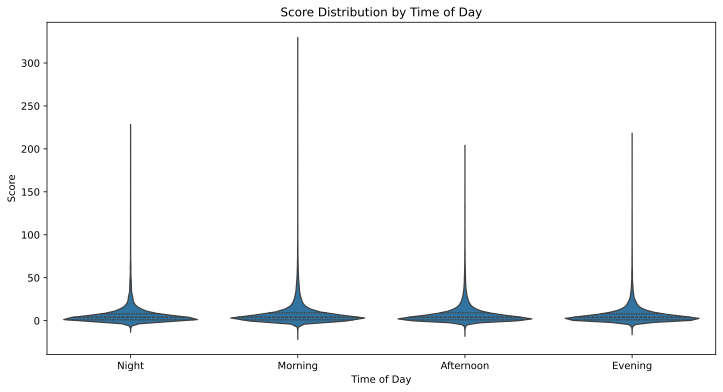

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.violinplot(data=stack_df, x='TimeOfDay', y='Score', inner='quartile', scale='width')
plt.title("Score Distribution by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Score")
plt.show()

/var/folders/rk/tj0xch_17p58txk7snwq6z5m0000gn/T/ipykernel_65094/2733764857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = stack_df.groupby('TimeOfDay')['Score'].mean()


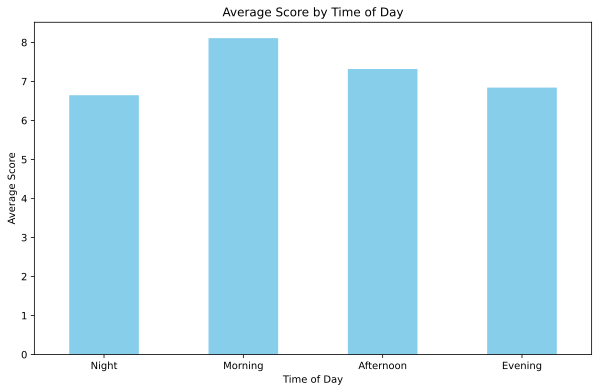

In [10]:
mean_scores = stack_df.groupby('TimeOfDay')['Score'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar', color='skyblue')

# Set title and labels
plt.title("Average Score by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Score")

# Display the plot
plt.xticks(rotation=0)  # Ensure the x-axis labels are horizontal
plt.show()

In [16]:
h_stat, p_value = stats.kruskal(morning_scores, afternoon_scores, evening_scores, night_scores)
print(f"\nKruskal-Wallis H test result: H-statistic = {h_stat:.3f}, p-value = {p_value:.3e}")



Kruskal-Wallis H test result: H-statistic = 112.007, p-value = 4.059e-24
